<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/Galactic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit

In [21]:
# Constants
Mtotal = 1E11
Ttotal = 12E9
Sft = 1E9
TauSun = 10E9

# Constant star formation rate
SFR = Mtotal/Sft

# Time elapsed array
T = np.linspace(0, Ttotal, 12000)
Tl = len(T)

# Mass range array
M = np.linspace(0.5, 20, 100)
dM = M[1] - M[0]
Ml = len(M)

# Time of formation array
Tform = np.arange(0, Sft, 1E7)
dT = Tform[1] - Tform[0]
Tfl = len(Tform)


In [25]:
# Finding how the number of stars evolves over time

# Finding E0 = Mtotal/Mtot
def Mtot(M):
  return (M**(-1.35))

y = Mtot(M) * dM
Int = np.trapz(y)
E0 = (SFR * dT)/Int
print(E0)

# Finding Number of stars per Mass interval
Stbrn = np.zeros(Ml)

for i in np.arange(0, Ml, 1):
  m = M[i]
  def Sbrn(m):
    return (m**(-2.35)) * E0 * dM
  Stbrn[i] = Sbrn(m)

print(Stbrn)
print(M)
print(np.sum(Stbrn))

375641348.47432154
[3.77218772e+08 1.72830407e+08 9.62939116e+07 6.03072728e+07
 4.08287967e+07 2.92226622e+07 2.18068058e+07 1.68097052e+07
 1.32986551e+07 1.07469839e+07 8.84016123e+06 7.38152826e+06
 6.24332318e+06 5.33980427e+06 4.61180223e+06 4.01748409e+06
 3.52663900e+06 3.11703603e+06 2.77204063e+06 2.47901801e+06
 2.22824093e+06 2.01212846e+06 1.82470621e+06 1.66121774e+06
 1.51784066e+06 1.39147672e+06 1.27959451e+06 1.18011051e+06
 1.09129802e+06 1.01171687e+06 9.40158751e+05 8.75604140e+05
 8.17188328e+05 7.64174275e+05 7.15930845e+05 6.71915213e+05
 6.31658581e+05 5.94754486e+05 5.60849207e+05 5.29633834e+05
 5.00837683e+05 4.74222814e+05 4.49579429e+05 4.26722011e+05
 4.05486058e+05 3.85725313e+05 3.67309416e+05 3.50121893e+05
 3.34058432e+05 3.19025406e+05 3.04938600e+05 2.91722108e+05
 2.79307375e+05 2.67632371e+05 2.56640864e+05 2.46281790e+05
 2.36508696e+05 2.27279256e+05 2.18554843e+05 2.10300152e+05
 2.02482864e+05 1.95073351e+05 1.88044419e+05 1.81371067e+05
 1.75

In [ ]:
# Finding the Luminosity evolution of the stars



'''
Stbrn = np.zeros(Ml)

for i in np.arange(0, Ml, 1):
  m = M[i]
  def Sbrn(m):
    return (m**(-2.35)) * E0 * dM
  Stbrn[i] = Sbrn(m)

print(Stbrn)
print(M)
print(np.sum(Stbrn))
'''

343066198.2511565
2.914889327767309
2.6402850975034813
100
100
[3.44506830e+08 1.57842769e+08 8.79434235e+07 5.50775012e+07
 3.72881743e+07 2.66885093e+07 1.99157467e+07 1.53519885e+07
 1.21454123e+07 9.81501881e+06 8.07355345e+06 6.74141132e+06
 5.70190996e+06 4.87674309e+06 4.21187248e+06 3.66909287e+06
 3.22081326e+06 2.84673054e+06 2.53165272e+06 2.26404066e+06
 2.03501065e+06 1.83763918e+06 1.66646996e+06 1.51715900e+06
 1.38621541e+06 1.27080959e+06 1.16862967e+06 1.07777280e+06
 9.96662009e+05 9.23982045e+05 8.58629354e+05 7.99672839e+05
 7.46322773e+05 6.97906033e+05 6.53846213e+05 6.13647562e+05
 5.76881935e+05 5.43178117e+05 5.12213062e+05 4.83704647e+05
 4.57405662e+05 4.33098801e+05 4.10592460e+05 3.89717210e+05
 3.70322811e+05 3.52275694e+05 3.35456801e+05 3.19759758e+05
 3.05089300e+05 2.91359920e+05 2.78494704e+05 2.66424330e+05
 2.55086187e+05 2.44423625e+05 2.34385288e+05 2.24924540e+05
 2.15998956e+05 2.07569882e+05 1.99602039e+05 1.92063185e+05
 1.84923802e+05 1.7815

Text(0, 0.5, 'Stars born')

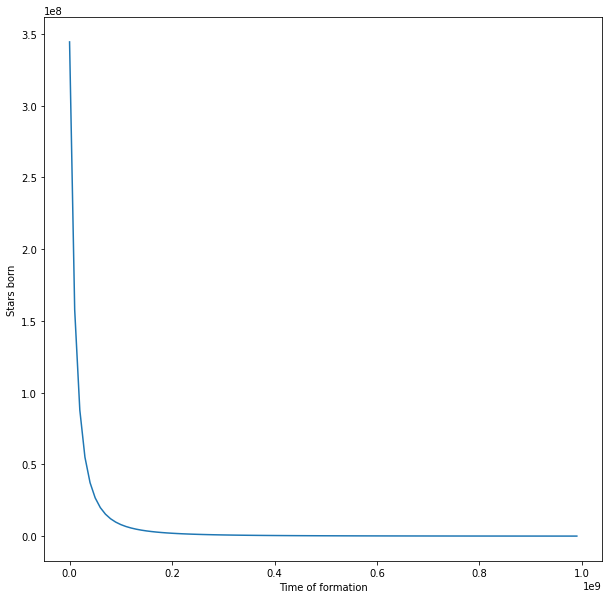

In [5]:
# Finding the Number of stars as a function of mass

# The E0 value can be found by summing all masses looking at the Saltpeter IMF, where E(Saltpeter) = E0 * (M**-2.35)
# The Number of stars in a galaxy can be found using: N(M) = integral(E(Saltpeter) * SFR * dt) from 0 to Tms
# The total number of Mass in the galaxy can be found by: Mtot = integral(M**-2.35) * M * dM) from MinMas to MaxMas

# Finding E0 = Mtotal/Mtot
def Mtot(M):
  return (M**(-1.35))

Integral = np.sum(Mtot(M) * dM)
Int, errInt = integrate.quad(Mtot, 0.5, 20)

#y = Mtot(M)
#Intogral = integrate.cumtrapz(y, Mtot(M), 0)
#print(np.sum(Intogral))

E0 = (SFR * dT)/Integral
print(E0)
print(Integral)
print(Int)

# Finding E(Saltpeter) = E0 * (M**-2.35)
Stbrn = np.zeros(Ml)

for i in np.arange(0, Ml, 1):
  m = M[i]
  def Sbrn(m):
    return (m**(-2.35)) * E0 * dM
  Stbrn[i] = Sbrn(m)

print(len(Stbrn))
print(len(Tform))

print(Stbrn)
print(Tform)

plt.figure(figsize = (10,10))
plt.plot(Tform, Stbrn);
plt.xlabel('Time of formation')
plt.ylabel('Stars born')

[344506830.0069922, 502349598.8754768, 590293022.3255827, 645370523.5133808, 682658697.7880399, 709347207.1201981, 729262953.8638647, 744614942.314268, 756760354.6125367, 766575373.4250008, 774648926.874354, 781390338.1913583, 787092248.155651, 791968991.2417533, 796180863.7261692, 799849956.5975943, 803070769.8542792, 805917500.3978232, 808449153.1174197, 810713193.774175, 812748204.4283917, 814585843.6130153, 816252313.5750371, 817769472.5774666, 819155687.9852107, 820426497.5722934, 821595127.2402601, 822672900.0374271, 823669562.0468894, 824593544.0915333, 825452173.4458443, 826251846.2847608, 826998169.0578623, 827696075.0908676, 828349921.3035874, 828963568.8660161, 829540450.8010955, 830083628.9184397, 830595841.9805784, 831079546.6273854, 831536952.2897462, 831970051.0911618, 832380643.5516539, 832770360.7612709, 833140683.5725454, 833492959.2661521, 833828416.0669867, 834148175.8251817, 834453265.1253228, 834744625.0450404, 835023119.7494638, 835289544.0793118, 835544630.26654

Text(0, 0.5, 'N')

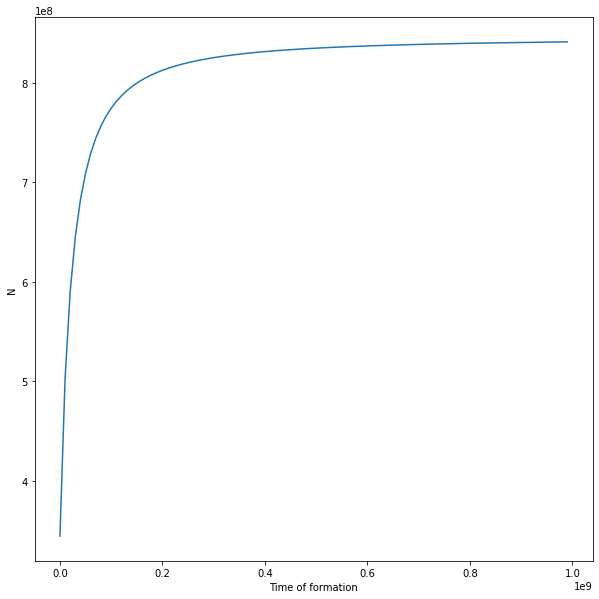

In [6]:
# Finding N(M) = integral(E(Saltpeter) * SFR * dt) from T1 to T2
# N(M) = Stbrn * SFR * dt
#N = Stbrn * SFR * dT
#print(N)

N=[]
j=0
for i in range(0,len(Stbrn)):
    j+=Stbrn[i]
    N.append(j)
     
print(N)

plt.figure(figsize = (10,10))
plt.plot(Tform, N);
plt.xlabel('Time of formation')
plt.ylabel('N')
